In [3]:
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt

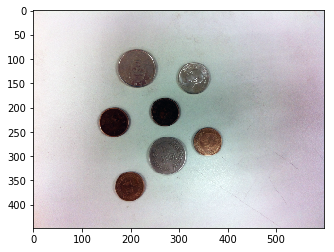

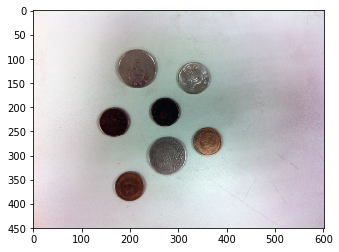

In [4]:
image = cv2.imread('data/coins.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

#高度縮小為450，寬度也等比例縮小。

r = 450.0 / image.shape[0]
dim = (int(image.shape[1] * r), 450)
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized)
plt.show()

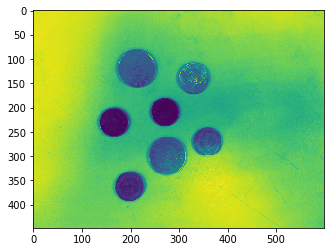

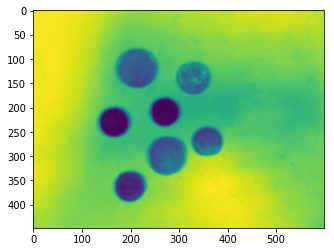

In [5]:
#轉換為灰階
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

#模糊化(使用高斯模糊)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blurred)
plt.show()

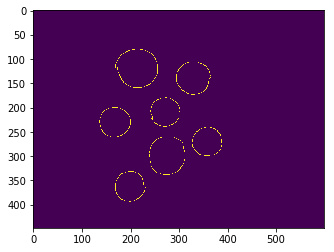

count 7 coins in this image


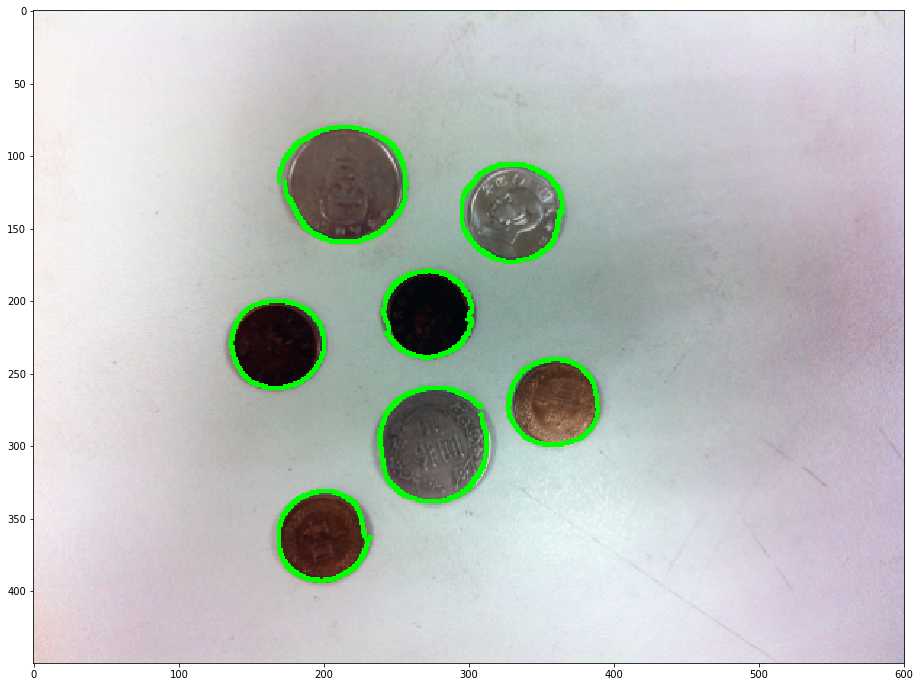

In [6]:
#使用Canny方法尋找邊緣
edged = cv2.Canny(blurred, 10, 170)
plt.imshow(edged)
plt.show()

#確定輪廓

contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print('count {} coins in this image'.format(len(contours)))

coins = resized.copy()
coins = cv2.drawContours(coins, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(16,12))
plt.imshow(coins)
plt.show()

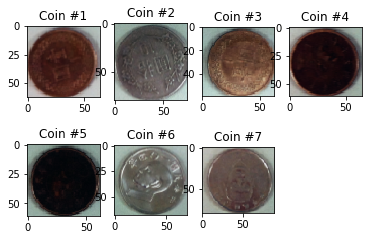

In [7]:
#取出圖形
plt.figure()

for (i, c) in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(c)
    coin = resized[y:y + h, x:x + w]
    
    plt.subplot(2,4,i+1)
    plt.title('Coin #{}'.format(i + 1))
    plt.imshow(coin)

1 45.5 411.4041086435318
2 46.0 507.44573962688446
3 2876.0 202.16652071475983
4 3034.5 206.4091613292694
5 45.0 412.13203024864197
6 49.5 459.68837893009186
7 62.5 550.1147855520248


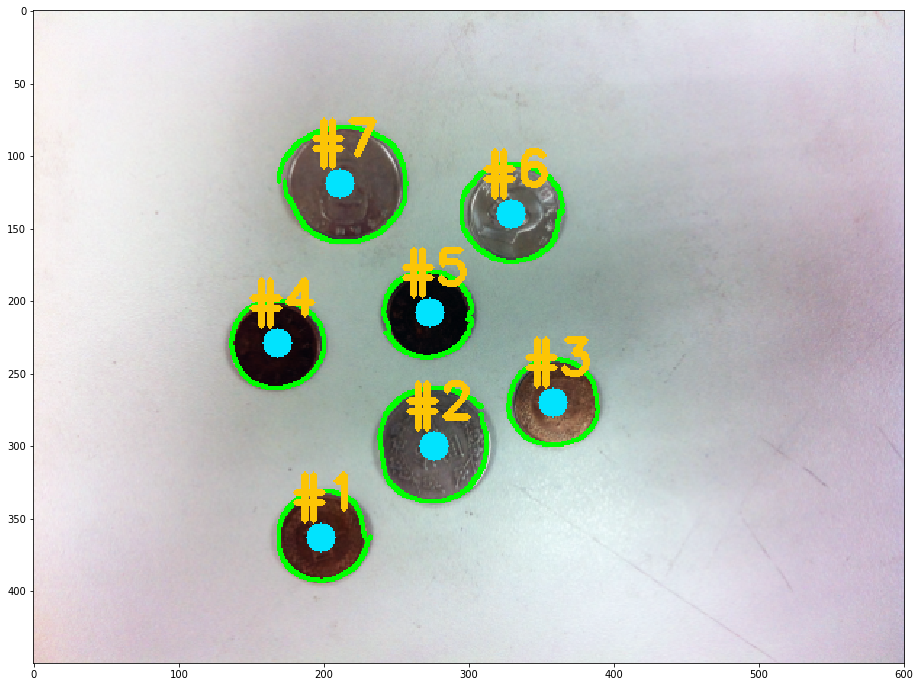

In [8]:
#標示中心點
plt.figure(figsize=(16,12))
for (i, c) in enumerate(contours):
    # CV2.moments會傳回一系列的moments值，我們只要知道中點X, Y的取得方式是如下進行即可。

    M = cv2.moments(c)
    area = cv2.contourArea(c) #計算面積
    perimeter = cv2.arcLength(c, True) #計算周長
    print(i+1, area, perimeter)
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    plt.imshow(cv2.circle(coins, (cX, cY), 10, (1, 227, 254), -1))
    plt.imshow(cv2.putText(coins, '#%d' %(i + 1), (cX-20, cY-20), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (252, 197, 5), 3))